<a href="https://colab.research.google.com/github/ogola89/Bio-Inspired-AI-Algorithms/blob/main/PyGAD_Keras_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook taken from https://console.paperspace.com/ml-showcase/notebook/rrawb4uwpmlrt21?file=%2FPaperspace_Gradient_Keras_PyGAD.ipynb

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 880 kB/s 


In [ ]:
import pygad

print(pygad.__version__)

2.16.3


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.9 kB/s 
     |████████████████████████████████| 5.8 MB 27.9 MB/s 
     |████████████████████████████████| 1.6 MB 32.4 MB/s 
     |████████████████████████████████| 438 kB 43.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.

In [ ]:
import tensorflow

print(tensorflow.__version__)

2.9.1


In [ ]:
import numpy 

In [ ]:
X = [4, -1, 0.3, 7.2]
function_inputs = X
Y = 9

# Y = w1X1 + w2X2 + w3X3 + w4X4

def fitness_func(solution, solution_idx):

    # SOP between each w and X.
    output = numpy.sum(solution*X)

    error = numpy.abs(output - Y)

    # The error may be 0.
    fitness = 1.0 / ( error + 0.000001)

    return fitness

In [ ]:
ga_instance = pygad.GA(num_generations=3000,
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       sol_per_pop=20,
                       num_genes=len(function_inputs), # 4 in this example
                       suppress_warnings=True)

In [ ]:
ga_instance.run()

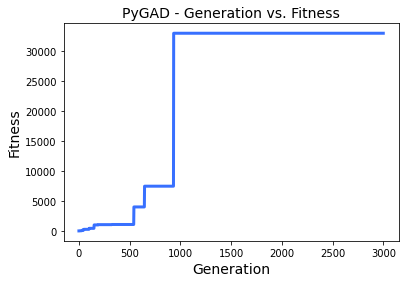

In [ ]:
fig = ga_instance.plot_result()

In [ ]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")
print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end="\n\n")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution:\n{prediction}".format(prediction=prediction), end="\n\n")

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

Parameters of the best solution:
[-0.43354651 -2.17535081  2.37658272  1.08969876]

Fitness value of the best solution:
32957.75932117121

Predicted output based on the best solution:
8.999970658131481

Best fitness value reached after 933 generations.


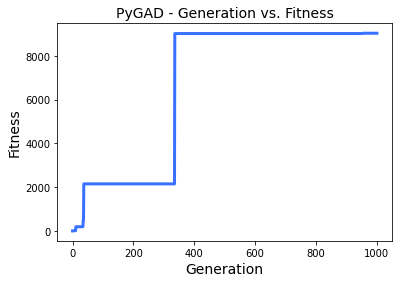

Parameters of the best solution:
[-0.46321398  2.74360713  2.58420774  1.78070709]

Fitness value of the best solution:
9035.062818117998

Predicted output based on the best solution:
8.99989032008331

Best fitness value reached after 953 generations.


In [ ]:
import pygad
import numpy

X = [4, -1, 0.3, 7.2]
Y = 9

# Y = w1X1 + w2X2 + w3X3 + w4X4

def fitness_func(solution, solution_idx):

    # SOP between each w and X.
    output = numpy.sum(solution*X)

    error = numpy.abs(output - Y)

    # The error may be 0.
    fitness = 1.0 / ( error + 0.000001)

    return fitness

ga_instance = pygad.GA(num_generations=1000,
                       num_parents_mating=10,
                       fitness_func=fitness_func,
                       sol_per_pop=20,
                       num_genes=len(function_inputs), # 4 in this example
                       suppress_warnings=True)

ga_instance.run()

fig = ga_instance.plot_result()

solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")
print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end="\n\n")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution:\n{prediction}".format(prediction=prediction), end="\n\n")

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

In [ ]:
# Data inputs
data_inputs = numpy.array([[0.02, 0.1, 0.15],
                           [0.7, 0.6, 0.8],
                           [1.5, 1.2, 1.7],
                           [3.2, 2.9, 3.1]])

# Data outputs
data_outputs = numpy.array([[0.1],
                            [0.6],
                            [1.3],
                            [2.5]])

In [ ]:
input_layer  = tensorflow.keras.layers.Input(3)
dense_layer1 = tensorflow.keras.layers.Dense(5, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(1, activation="linear")(dense_layer1)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense (Dense)               (None, 5)                 20        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 26
Trainable params: 26
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import pygad.kerasga

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

In [ ]:
def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    mae = tensorflow.keras.losses.MeanAbsoluteError()
    error = mae(data_outputs, predictions).numpy()

    solution_fitness = 1.0 / (error + 0.00000001)

    return solution_fitness

In [ ]:
def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

In [ ]:
ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

In [ ]:
ga_instance.run()

1/1 [==============================] - 0s 19ms/step
Generation = 1
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 24ms/step
Generation = 2
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 18ms/step
Generation = 3
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 20ms/step
Generation = 4
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 21ms/step
Generation = 5
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 18ms/step
Generation = 6
Fitness    = 11.261624005951271

1/1 [==============================] - 0s 17ms/step
Generation = 7
Fitness    = 12.627152005779827

1/1 [==============================] - 0s 17ms/step
Generation = 8
Fitness    = 12.627152005779827

1/1 [==============================] - 0s 21ms/step
Generation = 9
Fitness    = 12.627152005779827

1/1 [==============================] - 0s 19ms/step
Generation = 10
Fitness    = 12.627152005779827


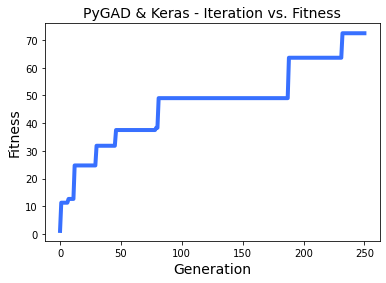

In [ ]:
fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [ ]:
solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

1/1 [==============================] - 0s 31ms/step
Parameters of the best solution:
[ 0.80905922  0.35014411  0.3752531  -1.1655667  -0.49521885  0.49414489
  0.39356903  0.98601754 -1.01882206 -1.84406528  0.11651719  1.03233169
 -1.20685098 -0.07002957 -1.26944871  0.          0.56957508  0.
 -4.01149361  0.21387938  0.51028013  0.07776046 -0.64363448  0.03361942
 -0.7690902   0.        ]

Length of the solution is: 26

Fitness value of the best solution:
72.45131170929331



In [ ]:
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

1/1 [==============================] - 0s 59ms/step
Predictions:
 [[0.1023272]
 [0.633781 ]
 [1.281252 ]
 [2.5003533]]

Correct Outputs:
 [[0.1]
 [0.6]
 [1.3]
 [2.5]]



In [ ]:
mae = tensorflow.keras.losses.MeanAbsoluteError()
abs_error = mae(data_outputs, predictions).numpy()
print("Absolute Error:\n", abs_error)

Absolute Error:
 0.013802363


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_2 (Dense)             (None, 4)                 12        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 17ms/step
Generation = 1
Fitness    = 1.4736821731510066

1/1 [==============================] - 0s 20ms/step
Generation = 2
Fitness    = 1.4736821731510066

1/1 [==============================] - 0s 23ms/step
Generation = 3
Fitness    = 1.4736821731510066

1/1 [======================

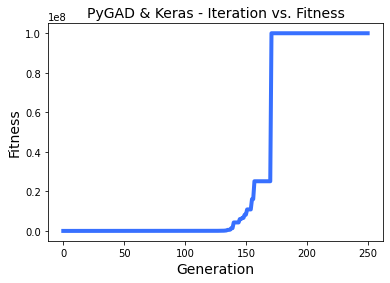

1/1 [==============================] - 0s 17ms/step
Parameters of the best solution:
[ 2.11836042  4.98032491 -2.42458677 -2.04480982 -0.34559267 -4.76296662
  2.44808486 -1.19871315  1.00934028 -0.42296459 -0.05034424  1.20066441
  1.0361496  -4.94218316 -4.20899021  4.18096244 -6.85892848  2.66105714
  3.26592276 -5.5857682   0.42850045  0.5913213 ]

Length of the solution is: 22

Fitness value of the best solution:
100000000.0

1/1 [==============================] - 0s 21ms/step
Predictions:
 [[9.9999988e-01 6.8306427e-08]
 [5.5809743e-09 1.0000000e+00]
 [2.7810969e-09 1.0000000e+00]
 [9.9999988e-01 7.0366582e-08]]

Correct Outputs:
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]

Binary Crossentropy :  0.0
Accuracy :  1.0


In [ ]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

# XOR problem inputs
data_inputs = numpy.array([[0.0, 0.0],
                           [0.0, 1.0],
                           [1.0, 0.0],
                           [1.0, 1.0]])
    
# XOR problem outputs
data_outputs = numpy.array([[1.0, 0.0],
                            [0.0, 1.0],
                            [0.0, 1.0],
                            [1.0, 0.0]])

input_layer  = tensorflow.keras.layers.Input(2)
dense_layer = tensorflow.keras.layers.Dense(4, activation="relu")(input_layer)
output_layer = tensorflow.keras.layers.Dense(2, activation="softmax")(dense_layer)

model = tensorflow.keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()

keras_ga = pygad.kerasga.KerasGA(model=model,
                                 num_solutions=10)

def fitness_func(solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)
    
    bce = tensorflow.keras.losses.BinaryCrossentropy()
    error = bce(data_outputs, predictions).numpy()

    fitness = 1.0 / (bce(data_outputs, predictions).numpy() + 0.00000001)

    return fitness

def on_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(ga_instance.last_generation_fitness)[1]), end='\n\n')

ga_instance = pygad.GA(num_generations=250, 
                       num_parents_mating=5, 
                       fitness_func=fitness_func,
                       initial_population=keras_ga.population_weights,
                       on_generation=on_generation,
                       suppress_warnings=True)

ga_instance.run()

fig = ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

solution, solution_fitness, _ = ga_instance.best_solution()
print("Parameters of the best solution:\n{solution}".format(solution=solution), end="\n\n")

# This is equation to the number of trainable parameters in the Keras model.
print("Length of the solution is:", len(solution), end='\n\n')

print("Fitness value of the best solution:\n{solution_fitness}".format(solution_fitness=solution_fitness), end='\n\n')

best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(data_inputs)
print("Predictions:\n", predictions, end='\n\n')

print("Correct Outputs:\n", data_outputs, end='\n\n')

bce = tensorflow.keras.losses.BinaryCrossentropy()
print("Binary Crossentropy : ", bce(data_outputs, predictions).numpy())

ba = tensorflow.keras.metrics.BinaryAccuracy()
ba.update_state(data_outputs, predictions)
accuracy = ba.result().numpy()
print("Accuracy : ", accuracy)